In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re

In [3]:
data_df = pd.read_csv("/content/drive/MyDrive/Youtube_Scraped/Scraped_Data.csv", header = 0, index_col=False)
data_df.head()

,Titles,VideoIDs,ChannelIDs,Views,Subs_count
0,김뿡,0qfXPIBFyHA,UCK3k-JljWSFBYCPCtvrhbvg,892,109000
1,분명 지누형 생일기념 탈출맵이라고 했는데... [김뿡],c0qQJNZZ2Ns,UCK3k-JljWSFBYCPCtvrhbvg,55373,109000
2,아이돌에게 이름을 다 빼앗긴 김씨 [김뿡],IwRug-zQ7co,UCK3k-JljWSFBYCPCtvrhbvg,96200,109000
3,혀ㅕ...혀...형.....!!!! [김뿡],DTRH51Z3O7E,UCK3k-JljWSFBYCPCtvrhbvg,67775,109000
4,그럼 화면을 돌려 [김뿡],KZ6f06EiQY8,UCK3k-JljWSFBYCPCtvrhbvg,51960,109000


In [4]:
data_df[data_df.VideoIDs.duplicated()]

,Titles,VideoIDs,ChannelIDs,Views,Subs_count
6,김뿡 쳇바퀴,0qfXPIBFyHA,UCa4GCwCq8MFAVz7IcHGE3ug,892,9040
50,픽셀,0qfXPIBFyHA,UCiMq04sS1ijeM0tda9OkuQw,892,105000
157,1년 만에 아프리카로 복귀한 트위치 스트리머,Nmch82NVcfE,UCW945UjEs6Jm3rVNvPEALdg,592234,571000
173,실수로 방송 끄는 것을 깜빡한 유튜버에게 벌어진 일,MMRD7e9YpJw,UCsU3fr78Lyzjp2RGLoQIdbw,1418303,852000
186,바하,0qfXPIBFyHA,UCEUSMOcASEX_Vwx0pu6cxWQ,892,5700
190,스트리머AI 연구소,0qfXPIBFyHA,UChLPRoBo3VGe4UJUKWbU4xg,892,2000
207,실수로 방송 끄는 것을 깜빡한 유튜버에게 벌어진 일,MMRD7e9YpJw,UCsU3fr78Lyzjp2RGLoQIdbw,1418303,852000
250,탬탬버린,0qfXPIBFyHA,UCCA8UWUW80iHqK9ymdjRwPg,892,491000
271,탬탬버린 다시보기,0qfXPIBFyHA,UCTYNOog4xiq-rs2EaSmTnJw,892,95700
300,주르르 JURURU,0qfXPIBFyHA,UCTifMx1ONpElK5x6B4ng8eg,892,258000


In [5]:
data_df = data_df.drop(data_df[data_df.VideoIDs.duplicated()].index)
data_df = data_df.drop(data_df[data_df.Views == 0].index)
data_df = data_df.drop(data_df[data_df.Subs_count == 0].index)
len(data_df)

335

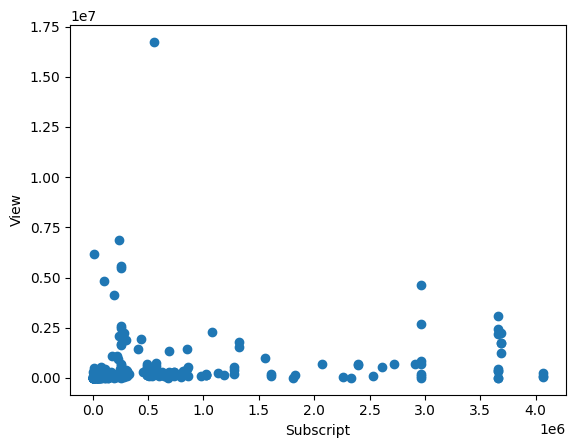

In [6]:
plt.scatter(data_df.Subs_count, data_df.Views)
plt.xlabel("Subscript")
plt.ylabel("View")
plt.show()

In [7]:
x_min = data_df.Views.min()
x_max = data_df.Views.max()

print(x_min, x_max)

data_df["Views_to_Subs"] = data_df.Views/data_df.Subs_count
data_df.head()

96 16732257


,Titles,VideoIDs,ChannelIDs,Views,Subs_count,Views_to_Subs
0,김뿡,0qfXPIBFyHA,UCK3k-JljWSFBYCPCtvrhbvg,892,109000,0.008183
1,분명 지누형 생일기념 탈출맵이라고 했는데... [김뿡],c0qQJNZZ2Ns,UCK3k-JljWSFBYCPCtvrhbvg,55373,109000,0.508009
2,아이돌에게 이름을 다 빼앗긴 김씨 [김뿡],IwRug-zQ7co,UCK3k-JljWSFBYCPCtvrhbvg,96200,109000,0.882569
3,혀ㅕ...혀...형.....!!!! [김뿡],DTRH51Z3O7E,UCK3k-JljWSFBYCPCtvrhbvg,67775,109000,0.621789
4,그럼 화면을 돌려 [김뿡],KZ6f06EiQY8,UCK3k-JljWSFBYCPCtvrhbvg,51960,109000,0.476697


In [9]:
views_median = data_df.Views_to_Subs.median()
views_median

0.6018680327868853

In [10]:
def make_target(data, median):
  inside_target = []
  for ratio in data:
    if ratio > median:
      inside_target.append(1)
    if ratio <= median:
      inside_target.append(0)
  return inside_target

target = make_target(data_df.Views_to_Subs, views_median)
print(target[:10])

[0, 0, 1, 1, 0, 1, 1, 1, 1, 1]


In [11]:
data_df["Target"] = target
data_df.head(10)

,Titles,VideoIDs,ChannelIDs,Views,Subs_count,Views_to_Subs,Target
0,김뿡,0qfXPIBFyHA,UCK3k-JljWSFBYCPCtvrhbvg,892,109000,0.008183,0
1,분명 지누형 생일기념 탈출맵이라고 했는데... [김뿡],c0qQJNZZ2Ns,UCK3k-JljWSFBYCPCtvrhbvg,55373,109000,0.508009,0
2,아이돌에게 이름을 다 빼앗긴 김씨 [김뿡],IwRug-zQ7co,UCK3k-JljWSFBYCPCtvrhbvg,96200,109000,0.882569,1
3,혀ㅕ...혀...형.....!!!! [김뿡],DTRH51Z3O7E,UCK3k-JljWSFBYCPCtvrhbvg,67775,109000,0.621789,1
4,그럼 화면을 돌려 [김뿡],KZ6f06EiQY8,UCK3k-JljWSFBYCPCtvrhbvg,51960,109000,0.476697,0
5,여자어 못 알아먹는 김뿡,75jJOwf0L9U,UC7DOU0Svi8jyEWBUH0nnD4g,1615,2530,0.638340,1
7,같은 파티원 유니온 상태 크아아아악!!!!! [김뿡],DkRSLsZ6p_Y,UCK3k-JljWSFBYCPCtvrhbvg,88713,109000,0.813881,1
8,김뿡X모양 (feat. 뢴트게늄) 크림소다와 샹들리에 KOREAN COVER,RzZYur8mbgI,UCK3k-JljWSFBYCPCtvrhbvg,67053,109000,0.615165,1
9,한 번 들으면 빠져나올 수 없는 노래 [김뿡],bsMXJB5syO8,UCK3k-JljWSFBYCPCtvrhbvg,85282,109000,0.782404,1
10,일본어를 애니로만 배웠을 때 생기는 일 ㅋㅋㅋㅋㅋ [김뿡],3cFHum3poAA,UCK3k-JljWSFBYCPCtvrhbvg,123638,109000,1.134294,1


In [14]:
def process_titles(titles):
  processed_titles = []

  for title in titles:
    sample_title = re.compile('[ㄱ-ㅎ가-힣a-zA-Z0-9]+').findall(title)
    sample_title = " ".join(sample_title)
    processed_titles.append(sample_title)
  return processed_titles

cleaned_titles = process_titles(data_df.Titles)
data_df["Cleaned_Titles"] = cleaned_titles
data_df.head()

,Titles,VideoIDs,ChannelIDs,Views,Subs_count,Views_to_Subs,Target,Cleaned_Titles
0,김뿡,0qfXPIBFyHA,UCK3k-JljWSFBYCPCtvrhbvg,892,109000,0.008183,0,김뿡
1,분명 지누형 생일기념 탈출맵이라고 했는데... [김뿡],c0qQJNZZ2Ns,UCK3k-JljWSFBYCPCtvrhbvg,55373,109000,0.508009,0,분명 지누형 생일기념 탈출맵이라고 했는데 김뿡
2,아이돌에게 이름을 다 빼앗긴 김씨 [김뿡],IwRug-zQ7co,UCK3k-JljWSFBYCPCtvrhbvg,96200,109000,0.882569,1,아이돌에게 이름을 다 빼앗긴 김씨 김뿡
3,혀ㅕ...혀...형.....!!!! [김뿡],DTRH51Z3O7E,UCK3k-JljWSFBYCPCtvrhbvg,67775,109000,0.621789,1,혀 혀 형 김뿡
4,그럼 화면을 돌려 [김뿡],KZ6f06EiQY8,UCK3k-JljWSFBYCPCtvrhbvg,51960,109000,0.476697,0,그럼 화면을 돌려 김뿡


In [15]:
cleaned_data = pd.DataFrame({"Titles": data_df.Cleaned_Titles,
                             "Target": data_df.Target})
cleaned_data.head()

,Titles,Target
0,김뿡,0
1,분명 지누형 생일기념 탈출맵이라고 했는데 김뿡,0
2,아이돌에게 이름을 다 빼앗긴 김씨 김뿡,1
3,혀 혀 형 김뿡,1
4,그럼 화면을 돌려 김뿡,0


In [19]:
cleaned_data.to_csv("/content/drive/MyDrive/Youtube_Scraped/cleaned_data.csv", index = False)